In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the Data

In [3]:
df = pd.read_csv("train.csv" , sep = "," ,encoding = "utf-8")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df.describe()
#no need to get details for Row Id and postal code because the description of them will not provide any useful insights

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df.describe()['Sales']

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

->>> <span style="font-size:18pt;"> Since that the mean is > median therefore the data is more likely to be right skewed </span>

In [9]:
df2= df.copy()

## 1- What are the top selling Categories?

In [224]:
category_sales= df.groupby(['Category']).sum().sort_values("Sales" , ascending= False)[["Sales"]]
category_sales

,Sales
Category,
Technology,827455.8730
Furniture,728658.5757
Office Supplies,705422.3340


In [225]:
category_sales.index

Index(['Technology', 'Furniture', 'Office Supplies'], dtype='object', name='Category')

->>> <span style="font-size:18pt;"> The answer is Technology </span>


## To visualize these numbers

<BarContainer object of 3 artists>

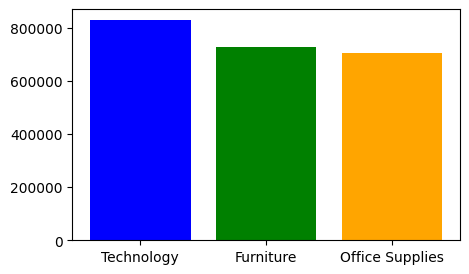

In [227]:
fig = plt.figure(figsize = (5, 3))
colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow']

# creating the bar plot
plt.bar(category_sales.index, category_sales['Sales'], color = colors)

## 2- Does Sales increase or decrease over Time?

In [13]:
df2= df.copy()
# df2['Order Date'] = pd.to_datetime(df2['Order Date'], format='%d/%m/%Y')
df2.sort_values(by='Order Date')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4009,4010,CA-2018-144463,01/01/2018,05/01/2018,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,California,90036.0,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430
6682,6683,CA-2018-154466,01/01/2018,02/01/2018,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,Wisconsin,53132.0,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600
8069,8070,CA-2018-151750,01/01/2018,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560
8070,8071,CA-2018-151750,01/01/2018,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420
8071,8072,CA-2018-151750,01/01/2018,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,1154,CA-2017-160395,31/12/2017,06/01/2018,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502.0,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768
2821,2822,CA-2017-100202,31/12/2017,05/01/2018,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,California,92804.0,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376
1152,1153,CA-2017-160395,31/12/2017,06/01/2018,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502.0,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640
5738,5739,CA-2017-156139,31/12/2017,06/01/2018,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,California,94109.0,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376


In [14]:
df2[['Order Date', 'Sales']]

,Order Date,Sales
0,08/11/2017,261.9600
1,08/11/2017,731.9400
2,12/06/2017,14.6200
3,11/10/2016,957.5775
4,11/10/2016,22.3680
...,...,...
9795,21/05/2017,3.7980
9796,12/01/2016,10.3680
9797,12/01/2016,235.1880
9798,12/01/2016,26.3760


In [15]:
random_50 = df2.sample(n=50, random_state=42)

In [16]:
random_50[["Order Date", "Sales"]]

,Order Date,Sales
532,07/09/2018,47.940
872,10/12/2015,11.360
1149,04/04/2016,10.950
2287,01/06/2018,17.480
4038,29/12/2015,21.120
1726,19/12/2016,88.832
4989,31/08/2018,6.672
4228,24/03/2017,22.480
6664,26/10/2018,251.580
7598,17/09/2015,38.256


In [17]:
random_50['Order Date'] = pd.to_datetime(random_50['Order Date'], format='%d/%m/%Y')

# Sort the DataFrame by 'Order Date' in ascending order
random_50_sorted = random_50.sort_values(by='Order Date', ascending=True)
random_50_sorted[['Order Date','Sales']]

,Order Date,Sales
4847,2015-06-25,71.632
2689,2015-06-30,5.248
3772,2015-08-06,62.910
8243,2015-08-12,806.336
8653,2015-09-13,199.980
7598,2015-09-17,38.256
3826,2015-10-07,107.440
4281,2015-11-14,69.264
872,2015-12-10,11.360
3768,2015-12-16,1013.832


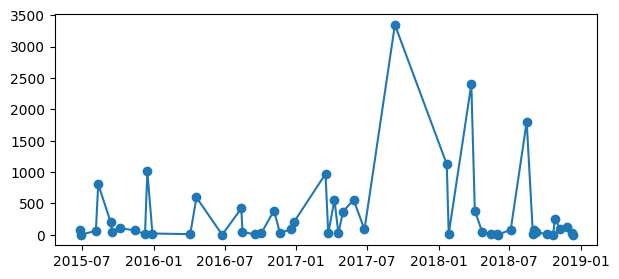

In [222]:
fig = plt.figure(figsize = (7,3))
plt.plot(random_50_sorted['Order Date'], random_50_sorted['Sales'], marker='o',linestyle='-')

->>> <span style="font-size:18pt;">Based on the random sample that was taken (To be able to visualize date against sales) </span>

->>> <span style="font-size:18pt;">it seems that sales witnessed a great increased between 2017 and 2018 then started to decrease again </span>

**--->Recommendation :  Since that sales decreased after 2018 this might indicate that the store lacks marketing or there's an increase in competition , The sudden increase might be due to seasonal trends or new product launch**

# 3. Which Customers contribute the most to the total sales?

<BarContainer object of 10 artists>

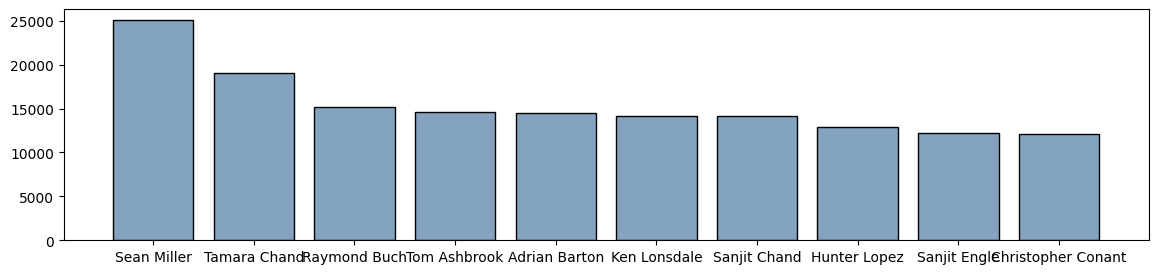

In [217]:
plt.figure(figsize=(14, 3))

total_sales_by_customer = df.groupby('Customer Name')['Sales'].sum()

total_sales_by_customer = total_sales_by_customer.sort_values(ascending=False)
top_customers = total_sales_by_customer.head(10)

plt.bar(top_customers.index, top_customers.values, edgecolor = 'black' , color = (0.2, 0.4, 0.6, 0.6))

([<matplotlib.patches.Wedge at 0x1f24d908790>,
 [Text(0.9592101101747381, 0.5384384500930136, 'Sean Miller'),
  Text(0.17377989642240774, 1.0861862398315574, 'Tamara Chand'),
  Text(-0.5648575985339992, 0.9438940053726391, 'Raymond Buch'),
  Text(-1.0023046684807617, 0.45319460669967226, 'Tom Ashbrook'),
  Text(-1.0843111118423385, -0.18511999550354313, 'Adrian Barton'),
  Text(-0.8016659212870033, -0.7532142793701275, 'Ken Lonsdale'),
  Text(-0.25950963393618076, -1.0689503028178202, 'Sanjit Chand'),
  Text(0.3393662202752761, -1.0463415162059053, 'Hunter Lopez'),
  Text(0.8087083170857571, -0.7456479449957082, 'Sanjit Engle'),
  Text(1.0664169842571747, -0.2697310061669455, 'Christopher Conant')],
 [Text(0.5232055146407663, 0.2936937000507347, '16.3%'),
  Text(0.0947890344122224, 0.592465221726304, '12.4%'),
  Text(-0.30810414465490865, 0.5148512756578031, '9.8%'),
  Text(-0.5467116373531427, 0.2471970581998212, '9.5%'),
  Text(-0.5914424246412755, -0.1009745430019326, '9.4%'),
  Tex

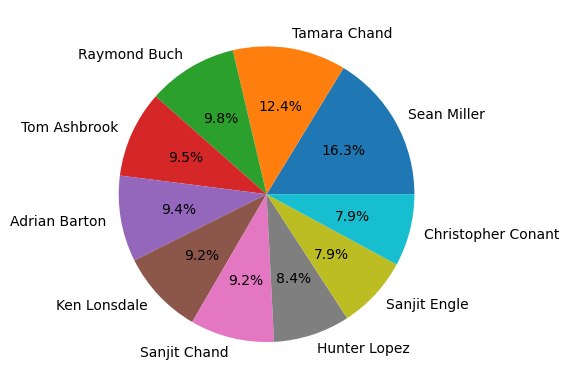

In [20]:
plt.pie(top_customers, labels=top_customers.index, autopct='%1.1f%%')


->>> <span style="font-size:18pt;">The customer contributing to the highest number of sales is Sean Miller </span>

**--->Recommendation : The store can use this information in Customer Segmentation to segment your customers based on their contribution to sales. The store can create targeted marketing campaigns and personalized offers to retain and attract these valuable customers. The store can also provide offers to loyal customers to maintain their relationship with the store**

# 4- Which countries, cities, states are the primary markets for the company's products?

In [21]:
primary_countries = df.groupby('Country').size().sort_values(ascending=False)
primary_cities = df.groupby('City').size().sort_values(ascending=False)
primary_states = df.groupby('State').size().sort_values(ascending=False)

In [22]:
primary_countries

Country
United States    9800
dtype: int64

In [23]:
primary_cities

City
New York City     891
Los Angeles       728
Philadelphia      532
San Francisco     500
Seattle           426
                 ... 
Keller              1
Jupiter             1
Jefferson City      1
Springdale          1
Aberdeen            1
Length: 529, dtype: int64

In [24]:
primary_states

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
New Jersey               122
Oregon                   122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

<AxesSubplot: xlabel='City'>

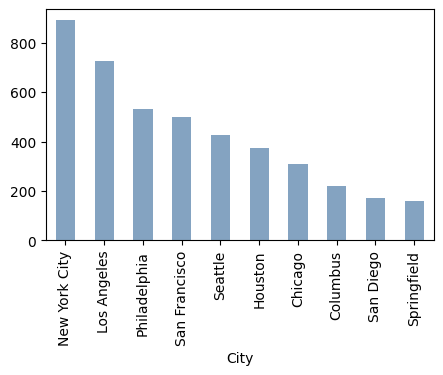

In [211]:
top_10 = primary_cities.head(10) 
plt.figure(figsize=(5,3))
top_10.plot(kind='bar', color = (0.2, 0.4, 0.6, 0.6))

<AxesSubplot: xlabel='State'>

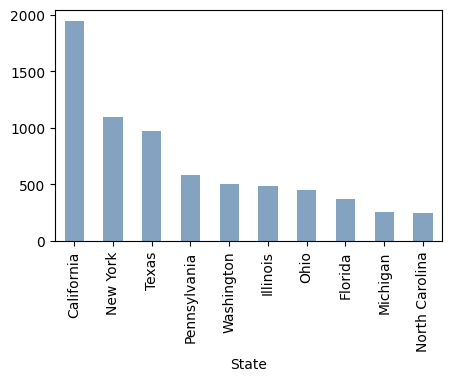

In [210]:
top_10_state = primary_states.head(10) 
plt.figure(figsize=(5,3))
top_10_state.plot(kind='bar', color = (0.2, 0.4, 0.6, 0.6))

->>> <span style="font-size:18pt;"> It is obvious from numbers and plots that California is the highest state , New York is the highest country and Us is the only country contributing  to sales </span>

**-->Recommendation: The store can use this information to focus marketing efforts on these locations by Tailoring their marketing campaigns to specific cities to increase their effectiveness. On the other hand , Knowing which cities are the least contributing to total sales can also offer valuable insights and benefits for the store , where it can provide insights into market share and position relative to competitors also , it can help develop targeted marketing campaigns to increase brand awareness and attract new customers.** 

# 5- What is the relationship between average shipping delay for orders and their postal codes?

In [27]:
df2['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df2['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

df2['Shipping Delay'] = (df2['Ship Date'] - df2['Order Date']).dt.days

average_delay_by_postal_code = df2.groupby('Postal Code')['Shipping Delay'].mean().reset_index()
average_delay_by_postal_code = average_delay_by_postal_code.sort_values(by='Shipping Delay', ascending=False)
average_delay_by_postal_code

,Postal Code,Shipping Delay
288,53186.0,7.0
381,72032.0,7.0
544,92399.0,7.0
371,68701.0,7.0
342,60543.0,7.0
...,...,...
132,29730.0,0.0
315,59102.0,0.0
272,48858.0,0.0
244,46368.0,0.0


Text(0, 0.5, 'Average Shipping Delay')

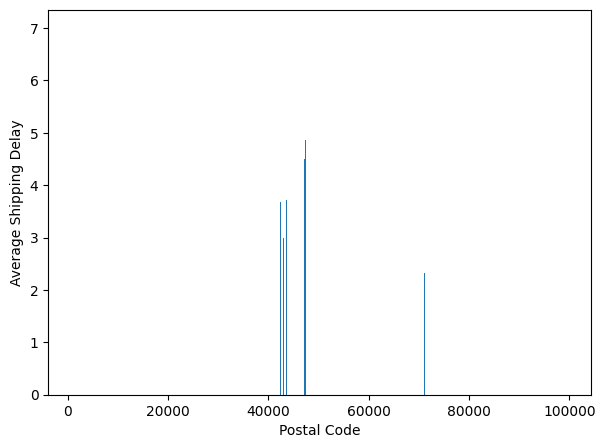

In [28]:
plt.figure(figsize=(7, 5))
# update bar width
plt.bar(average_delay_by_postal_code['Postal Code'], average_delay_by_postal_code['Shipping Delay'], width = 1.5)
plt.xlabel('Postal Code')
plt.ylabel('Average Shipping Delay')

->>> <span style="font-size:18pt;">> It is obvious that postal codes between 4000 andd 6000 have more shipping delays </span>

**--> Recommendation: : Understanding regions with more delays can help optimize delivery routes. The store can plan more efficient routes or explore alternative shipping methods to reduce delivery times.**

# 6-What is the distribution of sales across different product categories?

<AxesSubplot: xlabel='Sales', ylabel='Density'>

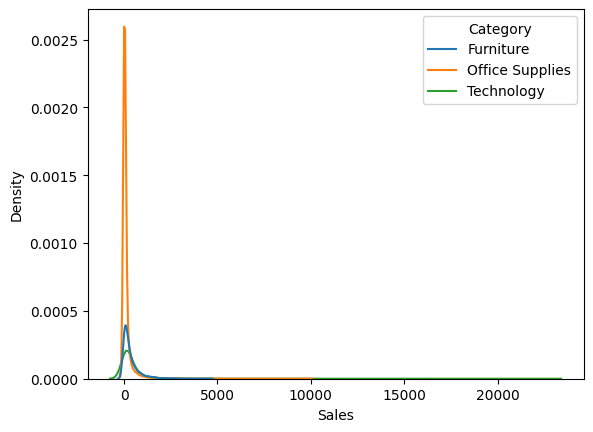

In [29]:
sns.kdeplot(data=df, x="Sales", hue="Category")

->>> <span style="font-size:18pt;">  high peak for office supplies indicates that there are some sales for office supplies with very high values (the highest one), but the majority of sales for office supplies fall in the lower range and extend to 10,000 </span>

->>> <span style="font-size:18pt;"> the peak for furniture which is lower than office supplies indicates that the sales occurs less frequent and the highest number of sales is also less than the total number of sales for office supplies (5000) </span>

->>> <span style="font-size:18pt;"> The peak for Technology which is the lowest peak indicates that the sales for technology are less and less frequent and there is rare extreme values that extend to values greater than 20,000 </span>

**-->Recommendation : for technology products with rare extreme sales, The store can focus on specialized marketing efforts to reach the right audience.**

# 7- What are the top-selling product Category in each state?

In [30]:
top_Selling_products=df.groupby(['State','Category']).sum().sort_values("Sales" , ascending= False)[["Sales"]]
top_Selling_products

Sales
State                Category                    
California           Technology       154684.1800
                     Furniture        152216.5355
                     Office Supplies  139405.7480
New York             Technology       126902.6900
                     Furniture         92504.5650
...                                           ...
South Dakota         Furniture           324.9000
District of Columbia Office Supplies     138.5200
Kansas               Furniture           111.1200
Maine                Furniture           109.4800
Montana              Furniture            63.9800

[142 rows x 1 columns]

In [31]:
highest_category_indices = top_Selling_products.groupby('State')['Sales'].idxmax()
highest_category_indices

State
Alabama                              (Alabama, Technology)
Arizona                               (Arizona, Furniture)
Arkansas                       (Arkansas, Office Supplies)
California                        (California, Technology)
Colorado                             (Colorado, Furniture)
Connecticut                 (Connecticut, Office Supplies)
Delaware                            (Delaware, Technology)
District of Columbia    (District of Columbia, Technology)
Florida                              (Florida, Technology)
Georgia                         (Georgia, Office Supplies)
Idaho                                   (Idaho, Furniture)
Illinois                            (Illinois, Technology)
Indiana                              (Indiana, Technology)
Iowa                                     (Iowa, Furniture)
Kansas                           (Kansas, Office Supplies)
Kentucky                            (Kentucky, Technology)
Louisiana                     (Louisiana, Office S

In [32]:
top_Selling_products = top_Selling_products.loc[highest_category_indices].sort_values("Sales" , ascending= False)
top_Selling_products

,,Sales
State,Category,
California,Technology,154684.180
New York,Technology,126902.690
Texas,Technology,64656.272
Washington,Technology,50536.710
Florida,Technology,46968.036
Pennsylvania,Technology,42064.069
Michigan,Office Supplies,37688.199
Ohio,Technology,34550.548
Illinois,Technology,31637.881


<AxesSubplot: xlabel='State,Category'>

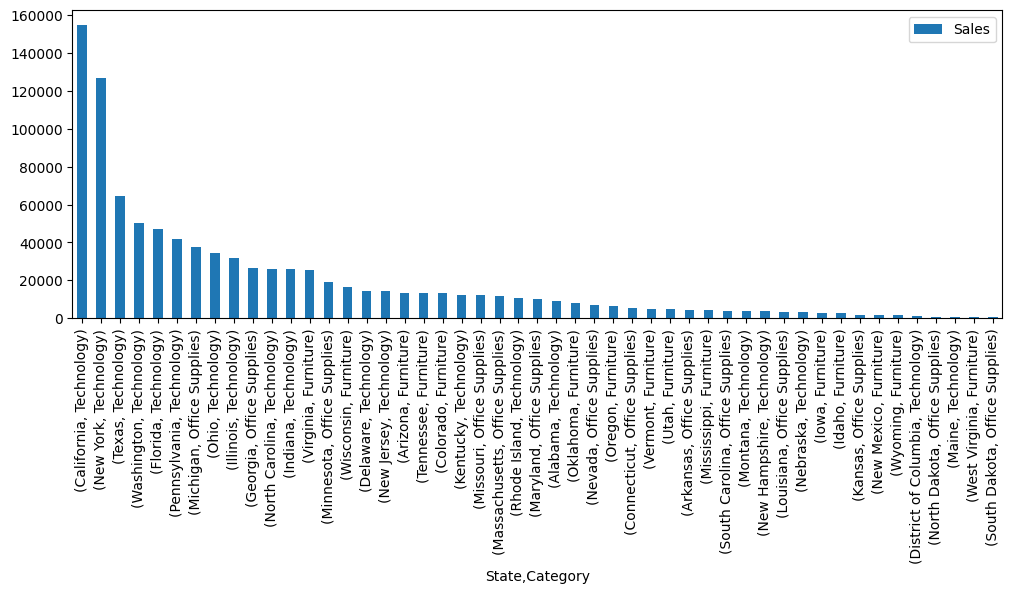

In [207]:
top_Selling_products.plot(kind='bar', figsize=(12, 4))

->>> <span style="font-size:18pt;"> From The plot and numbers California contributes to highest sales in Technology , The plot also depicts the Highest selling Category in each state </span>

**-->Recommendation: add Offers on top-selling product categories that customers in each state prefer to enhance customer satisfaction. Satisfied customers are more likely to become repeated buyers.**

# 8- Which Segments contribute the most to the total sales?

([<matplotlib.patches.Wedge at 0x1f24fcfc040>,
 [Text(-0.02642083976554102, 1.0996826538715994, 'Consumer'),
  Text(-0.5902005886829921, -0.9282581888236967, 'Corporate'),
  Text(0.913814451312435, -0.612326014940206, 'Home Office')],
 [Text(-0.014411367144840556, 0.5998269021117814, '50.8%'),
  Text(-0.3219275938270865, -0.5063226484492891, '30.4%'),
  Text(0.49844424617041905, -0.33399600814920327, '18.8%')])

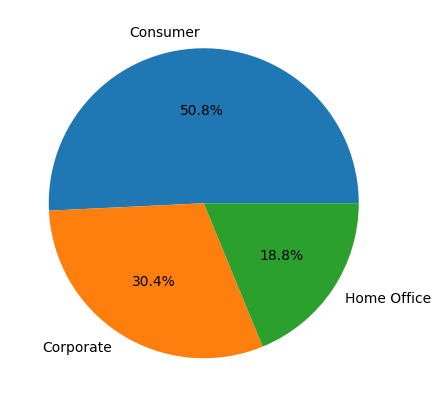

In [34]:
segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(5, 6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%')

->>> <span style="font-size:18pt;"> Consumers Take up most of the sales percentage </span>

**-->Recommendation: The store can use this information to segment theor customer base based on the contributing segments. This segmentation helps in personalizing marketing messages and offers, creating a more personalized customer experience.**

# 9- Are there any outliers in Sales?

<AxesSubplot: xlabel='Sales'>

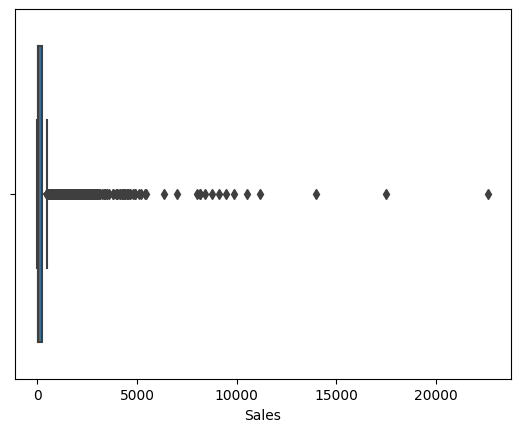

In [35]:
sns.boxplot(x=df['Sales'])

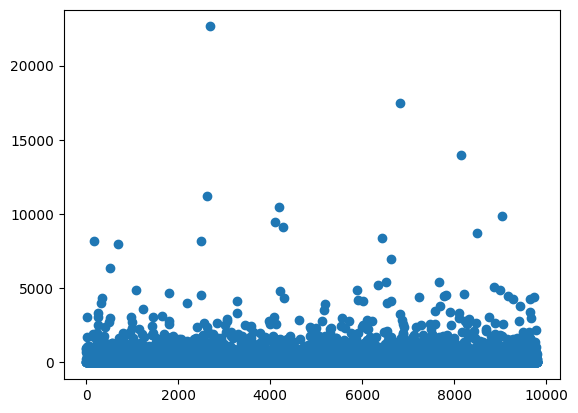

In [36]:
plt.scatter(range(len(df)), df['Sales'])

->>> <span style="font-size:18pt;"> The boxplot shows that sales has outliers </span>

# 10- What are the most popular shipping modes used?

In [37]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

->>> <span style="font-size:18pt;"> Standard Class is the most popular </span>

# 11- Which states have the highest number of customers

In [38]:
highestNo_cust= df.groupby('State')['Customer ID'].nunique()
highestNo_cust

State
Alabama                  34
Arizona                  99
Arkansas                 27
California              570
Colorado                 74
Connecticut              43
Delaware                 43
District of Columbia      4
Florida                 178
Georgia                  80
Idaho                    11
Illinois                231
Indiana                  67
Iowa                     16
Kansas                   14
Kentucky                 56
Louisiana                20
Maine                     3
Maryland                 45
Massachusetts            62
Michigan                105
Minnesota                42
Mississippi              25
Missouri                 28
Montana                   8
Nebraska                 23
Nevada                   23
New Hampshire            17
New Jersey               58
New Mexico               22
New York                409
North Carolina          120
North Dakota              2
Ohio                    196
Oklahoma                 34
Oregon        

In [39]:
highestNo_cust = highestNo_cust.sort_values(ascending=False)
highestNo_cust

State
California              570
New York                409
Texas                   367
Pennsylvania            255
Illinois                231
Washington              223
Ohio                    196
Florida                 178
North Carolina          120
Virginia                107
Michigan                105
Arizona                  99
Tennessee                84
Georgia                  80
Colorado                 74
Indiana                  67
Massachusetts            62
New Jersey               58
Kentucky                 56
Wisconsin                51
Oregon                   50
Maryland                 45
Connecticut              43
Delaware                 43
Minnesota                42
Alabama                  34
Oklahoma                 34
Missouri                 28
Arkansas                 27
Utah                     26
Mississippi              25
Rhode Island             24
Nevada                   23
Nebraska                 23
New Mexico               22
Louisiana     

<AxesSubplot: xlabel='State'>

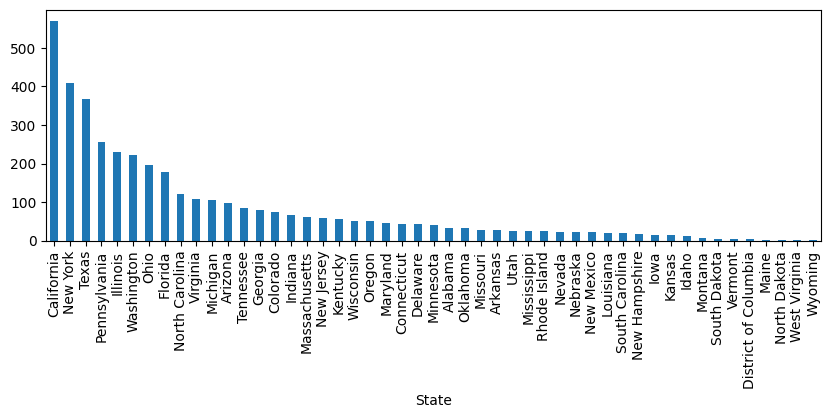

In [201]:
highestNo_cust.plot(kind='bar', figsize = (10,3))

->> <span style="font-size:18pt;"> California has the highest number of customers </span>

# 12- What is the average time it takes to ship an order for each state

In [41]:
df2['Shipping Delay']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Delay, Length: 9800, dtype: int64

In [42]:
average_shipping_time_per_state = df2.groupby('State')['Shipping Delay'].mean()
average_shipping_time_per_state

State
Alabama                 4.114754
Arizona                 4.067265
Arkansas                4.133333
California              3.866906
Colorado                3.675978
Connecticut             3.597561
Delaware                4.247312
District of Columbia    5.700000
Florida                 3.946381
Georgia                 3.858757
Idaho                   3.666667
Illinois                4.142857
Indiana                 4.325926
Iowa                    4.730769
Kansas                  3.958333
Kentucky                3.868613
Louisiana               3.048780
Maine                   5.000000
Maryland                4.019048
Massachusetts           3.881481
Michigan                4.083004
Minnesota               4.483146
Mississippi             4.207547
Missouri                4.075758
Montana                 4.600000
Nebraska                3.500000
Nevada                  4.384615
New Hampshire           3.703704
New Jersey              4.459016
New Mexico              4.513514
New 

In [43]:
average_shipping_time_per_state = average_shipping_time_per_state.sort_values(ascending=False)
average_shipping_time_per_state

State
District of Columbia    5.700000
Wyoming                 5.000000
Maine                   5.000000
Iowa                    4.730769
Montana                 4.600000
New Mexico              4.513514
Oklahoma                4.484848
Minnesota               4.483146
New Jersey              4.459016
South Dakota            4.416667
Nevada                  4.384615
Tennessee               4.382514
Utah                    4.358491
Oregon                  4.336066
Indiana                 4.325926
Delaware                4.247312
Mississippi             4.207547
Illinois                4.142857
Arkansas                4.133333
Alabama                 4.114754
Michigan                4.083004
Missouri                4.075758
Arizona                 4.067265
New York                4.051960
Wisconsin               4.038095
Maryland                4.019048
North Carolina          3.983806
Washington              3.972222
Kansas                  3.958333
Florida                 3.946381
Texa

<AxesSubplot: xlabel='State'>

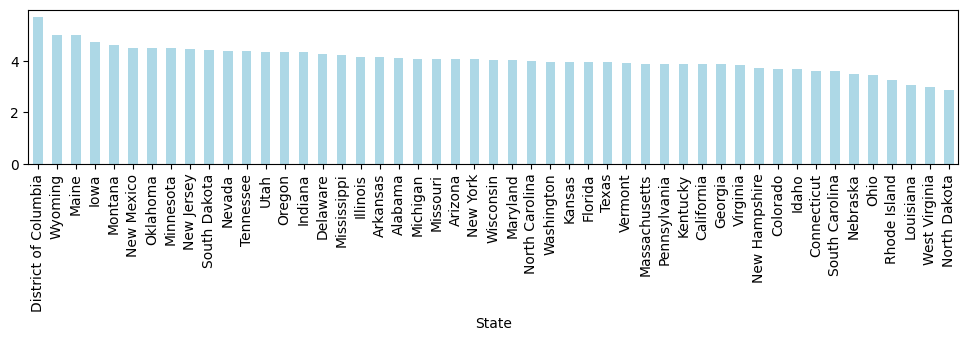

In [189]:
average_shipping_time_per_state.plot(kind='bar', color='lightblue', figsize= (12,2))

->> <span style="font-size:18pt;">  District of Columbia has the highest shipping delays while north dakota has the lowest </span>

In [45]:
df2.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Shipping Delay     0
dtype: int64

## 13. What is the percentage increase of sales between each year?

In [46]:
df2['Order Date'] = pd.to_datetime(df2['Order Date'], format='%d/%m/%Y')

df2.sort_values(by='Order Date', inplace=True)
df2['Year'] = df2['Order Date'].dt.year
df2['Year']

7980    2015
741     2015
740     2015
739     2015
1759    2015
        ... 
1297    2018
906     2018
645     2018
908     2018
5091    2018
Name: Year, Length: 9800, dtype: int32

In [47]:
sales = df2.groupby('Year')['Sales'].sum()
sales

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

In [48]:
sales_percentage_change = sales.pct_change() * 100

sales_percentage_change.dropna(inplace=True)
sales_percentage_change

Year
2016    -4.255484
2017    30.636812
2018    20.303396
Name: Sales, dtype: float64

<BarContainer object of 3 artists>

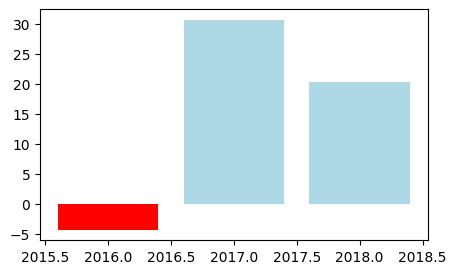

In [197]:
colors= ['red', 'lightblue', 'lightblue']
plt.figure(figsize=(5,3))
plt.bar(sales_percentage_change.index, sales_percentage_change.values, color= colors)

->>  <span style="font-size:18pt;"> As shown from the numbers and the bar plot , it seems that sales has decreased between 2015 and 2016 by 4% , increased by 30% between 2016 and 2017 and increased by 20% between 2017 and 2018 </span>

**Recommendation: since that sales increased significantly between 2016 and 2017, the store may investigate the factors that contributed to this growth and replicate successful strategies in subsequent years. Also the store can identify periods of improvement and areas where sales need further attention which was between 2015 and 2014 in order to not repeat what happened between this period of time**

## 14. What is the percentage increase of sales between each year for each product category?

In [50]:
df2['Category']

7980    Office Supplies
741     Office Supplies
740     Office Supplies
739     Office Supplies
1759    Office Supplies
             ...       
1297    Office Supplies
906           Furniture
645     Office Supplies
908     Office Supplies
5091    Office Supplies
Name: Category, Length: 9800, dtype: object

In [51]:
sales_categories = df2.groupby(['Year','Category'])['Sales'].sum()
sales_categories

Year  Category       
2015  Furniture          156477.8811
      Office Supplies    149512.8200
      Technology         173865.5070
2016  Furniture          164053.8674
      Office Supplies    133124.4070
      Technology         162257.7310
2017  Furniture          195813.0400
      Office Supplies    182417.5660
      Technology         221961.9440
2018  Furniture          212313.7872
      Office Supplies    240367.5410
      Technology         269370.6910
Name: Sales, dtype: float64

In [52]:
furniture_data = sales_categories.xs('Furniture', level='Category')
office_supplies_data = sales_categories.xs('Office Supplies', level='Category')
technology_data = sales_categories.xs('Technology', level='Category')

In [53]:
sales_percentage_change_furniture = furniture_data.pct_change() * 100
sales_percentage_change_office_supplies = office_supplies_data.pct_change() * 100
sales_percentage_change_technology = technology_data.pct_change() * 100

sales_percentage_change_furniture.dropna(inplace=True)
sales_percentage_change_office_supplies.dropna(inplace=True)
sales_percentage_change_technology.dropna(inplace=True)
print ("sales_percentage_change_furniture",sales_percentage_change_furniture)
print ("sales_percentage_change_office_supplies",sales_percentage_change_office_supplies)
print ("sales_percentage_change_technology",sales_percentage_change_technology)


sales_percentage_change_furniture Year
2016     4.841570
2017    19.358990
2018     8.426787
Name: Sales, dtype: float64
sales_percentage_change_office_supplies Year
2016   -10.961209
2017    37.027890
2018    31.767760
Name: Sales, dtype: float64
sales_percentage_change_technology Year
2016    -6.676296
2017    36.795913
2018    21.358953
Name: Sales, dtype: float64


Text(0, 0.5, 'Technology Sales Percentage Change')

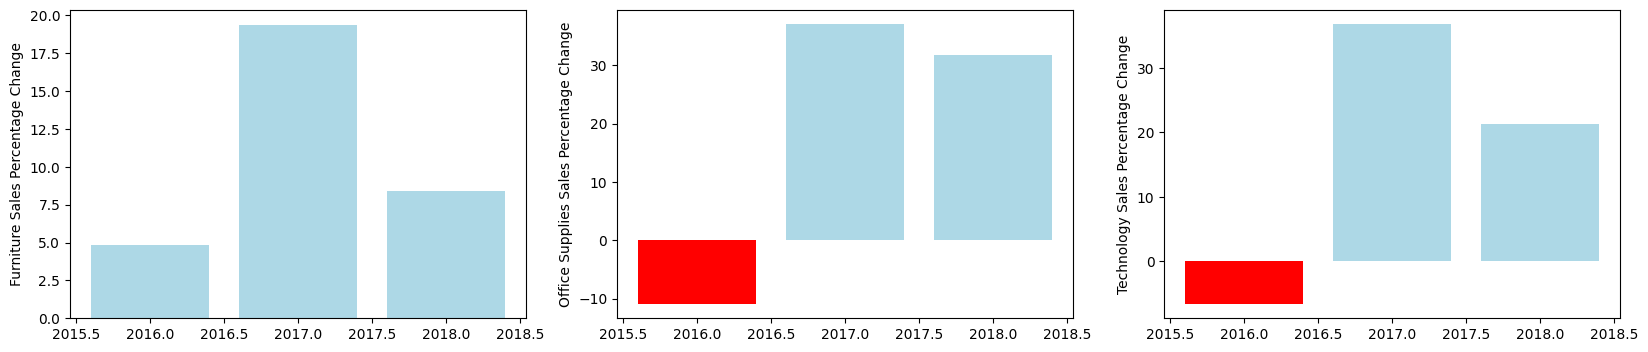

In [54]:
colors= ['red', 'lightblue', 'lightblue']
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
axs[0].bar(sales_percentage_change_furniture.index, sales_percentage_change_furniture.values,color= 'LightBlue')
axs[0].set_ylabel('Furniture Sales Percentage Change')
axs[1].bar(sales_percentage_change_office_supplies.index, sales_percentage_change_office_supplies.values,color= colors)
axs[1].set_ylabel('Office Supplies Sales Percentage Change')
axs[2].bar(sales_percentage_change_technology.index, sales_percentage_change_technology.values,color= colors)
axs[2].set_ylabel('Technology Sales Percentage Change')

->>> <span style="font-size:18pt;">From the numbers and bar plots , Furniture didn't decrease throughout the years. However, Office supplies decreased by 10% at first but witnessed the overall highest increase after 2016 similar to technology percentage changes </span>

# 15 . What do our best-buying customers have in common?

In [59]:
total_sales_by_customer= df.groupby(['Customer Name', 'Segment']).sum().sort_values("Sales" , ascending= False)[["Sales"]]
total_sales_by_customer

,,Sales
Customer Name,Segment,
Sean Miller,Home Office,25043.050
Tamara Chand,Corporate,19052.218
Raymond Buch,Consumer,15117.339
Tom Ashbrook,Home Office,14595.620
Adrian Barton,Consumer,14473.571
...,...,...
Mitch Gastineau,Corporate,16.739
Carl Jackson,Corporate,16.520
Sung Chung,Consumer,14.112


In [65]:
# we will view the segments for the top 10 buying customers
top_10= total_sales_by_customer.head(10)
top_10

,,Sales
Customer Name,Segment,
Sean Miller,Home Office,25043.050
Tamara Chand,Corporate,19052.218
Raymond Buch,Consumer,15117.339
Tom Ashbrook,Home Office,14595.620
Adrian Barton,Consumer,14473.571
Ken Lonsdale,Consumer,14175.229
Sanjit Chand,Consumer,14142.334
Hunter Lopez,Consumer,12873.298
Sanjit Engle,Consumer,12209.438


In [71]:
grouped_data = top_10.groupby('Segment').sum()
grouped_data

,Sales
Segment,
Consumer,95120.281
Corporate,19052.218
Home Office,39638.670


In [75]:
# we will then view the most common states of the top 10 buying customers
total_sales_by_customer_state= df.groupby(['Customer Name', 'State']).sum().sort_values("Sales" , ascending= False)[["Sales"]]
top_10_state= total_sales_by_customer_state.head(10)
grouped_data_state = top_10_state.groupby('State').sum()
top_10_state

,,Sales
Customer Name,State,
Sean Miller,Florida,23661.228
Tamara Chand,Indiana,18336.740
Raymond Buch,Washington,14052.480
Tom Ashbrook,New York,13723.498
Becky Martin,Texas,10539.896
Hunter Lopez,Delaware,10499.970
Sanjit Chand,Minnesota,9900.190
Adrian Barton,Michigan,9892.740
Bill Shonely,New Jersey,9135.190


In [78]:
# since the top 10 customers have no common states we will try to view the top 20 customers
top_20_state= total_sales_by_customer_state.head(20)
grouped_data_state = top_20_state.groupby('State').sum()
top_20_state

,,Sales
Customer Name,State,
Sean Miller,Florida,23661.228
Tamara Chand,Indiana,18336.740
Raymond Buch,Washington,14052.480
Tom Ashbrook,New York,13723.498
Becky Martin,Texas,10539.896
Hunter Lopez,Delaware,10499.970
Sanjit Chand,Minnesota,9900.190
Adrian Barton,Michigan,9892.740
Bill Shonely,New Jersey,9135.190


In [84]:
# we will then view the most common Ship Modes of the top 10 buying customers
total_sales_by_customer_shipMode= df.groupby(['Customer Name', 'Ship Mode']).sum().sort_values("Sales" , ascending= False)[["Sales"]]
top_10_shipMode= total_sales_by_customer_shipMode.head(10)
grouped_data_shipMode = top_10_shipMode.groupby('Ship Mode').sum()
top_10_shipMode

,,Sales
Customer Name,Ship Mode,
Sean Miller,Standard Class,25035.082
Tamara Chand,Standard Class,18951.820
Raymond Buch,First Class,14052.480
Tom Ashbrook,First Class,13807.770
Hunter Lopez,Standard Class,12800.280
Sanjit Chand,Standard Class,12794.584
Adrian Barton,Standard Class,12550.831
Caroline Jumper,Standard Class,11164.974
Becky Martin,Standard Class,10896.686


In [88]:
# Finally , will then view the most common bought categories of the top 10 buying customers
total_sales_by_customer_category= df.groupby(['Customer Name', 'Category']).sum().sort_values("Sales" , ascending= False)[["Sales"]]
top_10_Category= total_sales_by_customer_category.head(10)
grouped_data_Category = top_10_Category.groupby('Category').sum()
top_10_Category

,,Sales
Customer Name,Category,
Sean Miller,Technology,23481.508
Tamara Chand,Technology,17997.950
Raymond Buch,Technology,14265.416
Tom Ashbrook,Technology,13709.958
Sanjit Chand,Office Supplies,12081.258
Hunter Lopez,Technology,11640.810
Adrian Barton,Office Supplies,11489.256
Christopher Conant,Technology,11322.318
Ken Lonsdale,Office Supplies,9654.950


->>  <span style="font-size:18pt;">Most of the top buying customers are consumers , From New York , use standard class as ship mode and buy Technology products </span>

**--> Recommendation: With this information, the store can create targeted marketing campaigns specifically designed for consumer customers in New York who are interested in technology products. This approach can lead to higher engagement and satisfied customers.**


# 16 . What do our worst-buying customers have in common?

In [94]:
least_20_Category= total_sales_by_customer_category.tail(20)
least_20_Category_counts= least_20_Category.index.get_level_values('Category').value_counts()
least_20_Category_counts

Category
Furniture          7
Technology         7
Office Supplies    6
Name: count, dtype: int64

In [96]:
least_20_Segment= total_sales_by_customer.tail(20)
least_20_Segment_counts= least_20_Segment.index.get_level_values('Segment').value_counts()
least_20_Segment_counts

Segment
Consumer       10
Corporate       7
Home Office     3
Name: count, dtype: int64

In [97]:
least_20_state= total_sales_by_customer_state.tail(20)
least_20_state_counts= least_20_state.index.get_level_values('State').value_counts()
least_20_state_counts

State
Texas           9
Florida         3
Oregon          2
Pennsylvania    2
Illinois        2
Arizona         1
Colorado        1
Name: count, dtype: int64

In [98]:
least_20_shipmode= total_sales_by_customer_shipMode.tail(20)
least_20_shipmode_counts= least_20_shipmode.index.get_level_values('Ship Mode').value_counts()
least_20_shipmode_counts

Ship Mode
First Class       8
Same Day          7
Standard Class    3
Second Class      2
Name: count, dtype: int64

->> <span style="font-size:18pt;"> While the least buying customers are also consumers, from Texas , use First class as ship mode  and buy Furniture and Technology products </span>

****Recommendation: by analyzing the purchasing behavior of the least buying customers this can help the store identify areas for improving the overall customer experience. By providing excellent service and addressing pain points to encourage repeated purchases. also , it is recommended to Engage with the least buying customers to allow the store to gather feedback and understand their expectations better.**

# 17. How does sales change over time for each product?

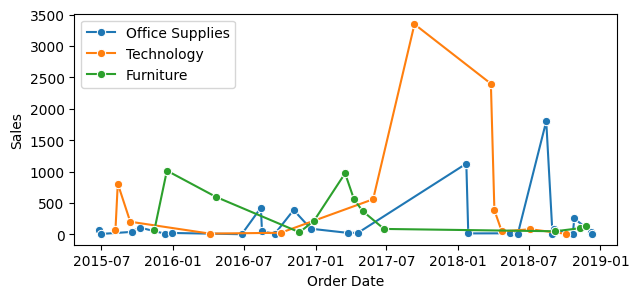

In [186]:
fig, ax = plt.subplots(figsize=(7, 3))

categories = random_50_sorted['Category'].unique()

for category in categories:
    category_data = random_50_sorted[random_50_sorted['Category'] == category]
    sns.lineplot(data=category_data, x='Order Date', y='Sales', marker='o', linestyle='-', label=category)


->> <span style="font-size:18pt;"> Technology witnessed a great increase between 2017 and 2018 while the rest of categories are somehow consistent compared to Technology sales </span>

# 18. What is the number of orders for each product versus its total contribution to sales?

In [171]:
category_orders = df.groupby('Category')['Order ID'].nunique()
category_orders

Category
Furniture          1727
Office Supplies    3676
Technology         1519
Name: Order ID, dtype: int64

In [172]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

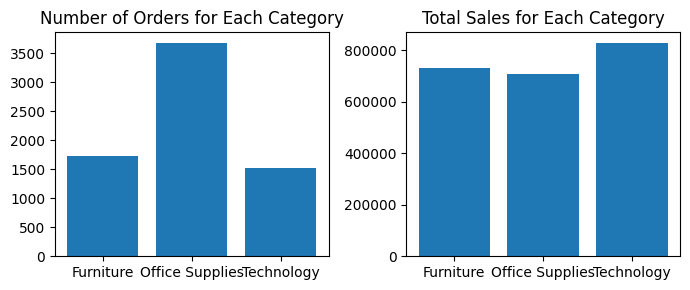

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
axes[0].bar(category_orders.index, category_orders.values)
axes[0].set_title('Number of Orders for Each Category')
axes[1].bar(category_sales.index , category_sales.values)
axes[1].set_title('Total Sales for Each Category')
plt.tight_layout()
plt.show()

->><span style="font-size:18pt;"> Number of orders was the highest for office supplies. However, office supplies contributed to the lowest sales </span>

# 19. How does sales change over time for each segment?

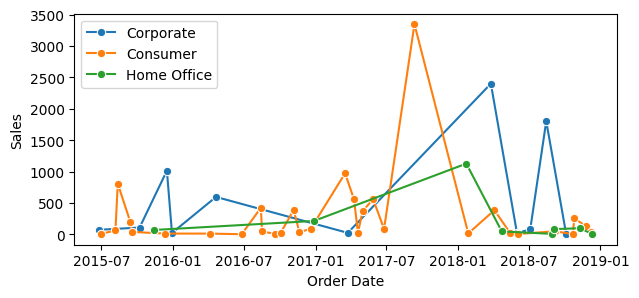

In [185]:
fig, ax = plt.subplots(figsize=(7, 3))

segments = random_50_sorted['Segment'].unique()

for segment in segments:
    segment_data = random_50_sorted[random_50_sorted['Segment'] == segment]
    sns.lineplot(data=segment_data, x='Order Date', y='Sales', marker='o', linestyle='-', label=segment)


->> <span style="font-size:18pt;"> sales witnessed a great increase for consumers and corporate customers between 2017 and 2018 </span>

# Removing Duplicates

In [ ]:
df.duplicated().sum()
# no duplicated rows to remove

0

# Encoding Categorical Variables

In [72]:
df2['Ship Mode'].replace("Standard Class" , 0 , inplace = True)
df2['Ship Mode'].replace("Second Class" , 1 , inplace = True)
df2['Ship Mode'].replace("First Class" , 2 , inplace = True)
df2['Ship Mode'].replace("Same Day" , 3 , inplace = True)
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [73]:
df2['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [74]:
df2['Segment'].replace("Consumer" , 0 , inplace = True)
df2['Segment'].replace("Corporate" , 1 , inplace = True)
df2['Segment'].replace("Home Office" , 2 , inplace = True)
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,1,DV-13045,Darrin Van Huff,1,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [75]:
df2['Category'].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [76]:
df.columns.to_list()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [77]:
df2['Category'].replace("Office Supplies" , 0 , inplace = True)
df2['Category'].replace("Furniture" , 1 , inplace = True)
df2['Category'].replace("Technology" , 2 , inplace = True)
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,1,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,1,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,1,DV-13045,Darrin Van Huff,1,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,0,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,1,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,0,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,0,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


# Removing useless columns to decrease computation

In [228]:
df2.drop(columns=['Row ID'], inplace=True)

In [229]:
df2.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
